# UCL Candidate Code: ZZBD5

# Module Title: Machine Learning in Smart Buildings
# Module Code: BENV0119

# Introduction

Buildings are currently the main consumers of energy and the main emitters of atmospheric $CO_{2}$ [1]. In the UK, buildings are responsible for 46 % of all $CO_{2}$ emissions [2]. Therefore, reducing energy consumption in buildings becomes the key objective of today's building projects. 

In recent years, machine learning (ML) has been playing an increasingly important role in energy-efficient building design [3]. Typically, ML can be divided into supervised learning, unsupervised learning, and reinforcement learning. In the building industry, supervised learning is widely used for the prediction of building energy consumption, unsupervised learning is commonly used for anomaly detection within building systems, and reinforcement learning is used for the optimisation of building control systems [4].

In this report, the authors will investigate the application of these three ML methods to smart buildings through three case study tasks. The following chapters will detail the objectives of each task, the theory of the selected algorithms, the research methodology, and the analysis of the results. In addition, all programs in this report are running on a 2022 model Surface Laptop Go with an Intel(R) Core(TM) i5-1035G1 processor and 8GB of RAM.


# Task 1: Supervised Learning

## 1. Introduction and Aims

Supervised learning can predict unknown outputs from new input data by analysing known inputs and outputs in the data. The output of a supervised learning function can be a continuous value (known as regression analysis) or predict a categorical label (known as classification) [5].

This task aims to investigate the performance of different supervised learning algorithms for predicting energy consumption in buildings. This task will be divided into two subtasks, the first subtask will compare the accuracy and running time of two different ML classification algorithms when predicting whether a building uses gas or not. The second subtask is to compare the accuracy as well as the running speed of two different ML regression algorithms when predicting the gas usage of a building.

In order to achieve this aim, the folliwng objectives will be to:

- pre-process the sensor data and divide the data into a training dataset for machine learning model training and a test dataset;
- select the input parameters for the model training process based on the relevance of the features;
- train ML models by using a training dataset to predict whether a building uses gas and the amount of gas used per half hour;
- evaluate the accuracy of different algorithms using the test dataset and the time taken to train and validate the models;
- build the best-performing model for this data by hyperparameters tuning.

The remainder of the report is ordered as follows: Chapter 2 details the ML algorithm used in this task and its theory. Chapter 3 presents the method for implementing the ML-based model for predicting building gas usage. Chapter 4 presents an analysis and discussion of the results produced by the different ML algorithms. Chapter 5 provides conclusions and recommendations for future work.

# 2. Theory

For classification, the K-NearestNeighbo (KNN) algorithm and the Support Vector Machine (SVM) algorithm will be chosen for comparison. For regression, the decision tree algorithm and random forest algorithm will be selected for comparison. The choice of algorithms is based on the current mainstream ML algorithms and the mathematical principles of the selected algorithms are presented in this section.

### 2.1 K-NearestNeighbo (KNN)

KNN is a non-parameter algorithm that, for classification problems, classifies data by measuring the distance between different values. Mathematically, KNN will calculate the distances between each data point to be classified and other nearby data points, and then select a predicted class label for that data point based on the nearest K data points and their known class. In this task, the Euclidean distance will be used to calculate distances between the query point $x_i$ and all the training examples in $Y$. The mathematical definition of Euclidean distance is as the following Equaiton [5].

**Equation 1:** 
$$d(x,y)= \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$$

where, $d$ is the Euclidean distance, $x_i$ is the i-th query point, and $y_i$ is the i-th point in the training dataset.

### 2.2 Support Vector Machine (SVM)

The SVM algorithm is a method for finding the best line or plane that separates two groups of data points in space. This line or plane is called the hyperplane. The SVM algorithm finds the optimal hyperplane that separates the data into two classes by maximizing the margin between the closest points (i.e., support vectors) from both classes to the hyperplane [6]. In this task, the Radial Basis Function (RBF) will be used as the kernel of the SVM, as it is flexible and can model complex decision boundaries. The mathematical definition of the RBF kernel is as follows [7].

**Equation 2:** 
$$k(x_i,y_i)= exp{[-\frac{||x_i-x_j||^2}{2\sigma}]}$$

where, ${||x_i-x_j||^2}$ is the squared Euclidean distance between the two feature vectors $x_i$ and $x_j$, and $\sigma$ is a hyprtparameter of SVM algorithm.

### 2.3 Decision Tree (DT)

Decision trees are both a classification algorithm and a regression algorithm. In the regression problem, the regression tree uses minimum square error as the splitting rule. Mathematically, for a random feature A, A is divided into data sets D1 and D2 according to a random split points S. The best-split point for feature A is found by using the Mean Square Error (MSE) equation (Equation 3) to find the split point that has the minimum mean squared difference between the respective sets D1 and D2 and the minimum sum of the mean squared differences of D1 and D2. In the end, the selected best-split point is used to determine the corresponding output [8].

**Equation 3:** 
$$MSE= \frac{1}{N}\sum_{i=1}^{n}(f_i-y_i)^2$$

where, $N$ is the number of data point, $f_i$ is the value returned by the model, and $y_i$ is the actual value for data $i$.

### 2.4 Random Forest (RF)

A random forest can be seen as an integration of decision trees. Mathematically, in the beginning, the bootstrap approach is used to create m sub-training sets based on the total data set. Next, a decision tree is created for each training set. When a node finds a feature that must be split, it randomly selects a subset of features, searches for the best option among them, and applies it to the node that needs to be split. The mathematical equation for Random Forest Regression can be expressed as Equation 4 [9]. 

**Equation 4:** 
$$RF= \frac{1}{i}[t_1·prob(x)+t_2·prob(x)+...+t_i·prob(x)]$$

where, $t_i$ is the i-th decision tree, $t_1·prob(x)$ is the prediction of the i-th tree for x. The output of the RL regressor is the average prediction of all the decision trees in the forest.

## 3. Methods

Figure 1 illustrates the process of building a gas prediction model using supervised learning in this task. This report will use the sklearn package in Python to train machine learning models. The following section will introduce the dataset used for the case study, and the methods used for model training and evaluation in detail.

![jupyter](./pt1.png)
*Fig.1 Method for gas prediction model design*

### 3.1 Dataset Description

In this study, the authors selected data from Building 4 in the REFIT smart home dataset provided by Loughborough University and climate data from the monitoring period as the dataset for the case study [10]. The data was collected through building measurements, building sensors (e.g. smart meters, thermostat sensors, motion sensors, door, and window sensors, etc.), and home interviews.

However, the dataset has a large amount of missing data and a temporal mismatch problem between different data. Through data cleaning, the authors finally retained a part of the sensor data from December 2013 to March 2014 for training the model. This data contains a total of 33 features and 1 target, and the data file is included in the attachment. 

For the training target, the gas volume will be used as the target for the regression model training. At the same time, for the classification model, the authors replaced the data greater than 0 in the gas volume with 1 as the target data for training the binary classification model. In particular, all data were normalised to improve the accuracy of the training and the convergence speed of the model.

### 3.2 Feature Selection

Due to the large amount of data in the original dataset, a 5-fold cross-validation (CV) is selected to select the input features in order to improve the speed of the program and the accuracy of the prediction model as well as prevent overfitting [11]. CV can provide a more accurate assessment of the model's performance by using a variety of subsets of the data to train and evaluate the model [12]. In this report, the authors will use the cv scores to select a few features with the highest scores as input features for ML model training. After feature selection, column-wise normalisation was carried out to scale data, creating the final dataset.

### 3.3 Hyperparameter Tuning

In this task, the combined grid-search and CV method is chosen for hyperparameter selection. GridSearch-CV will try to enumerate all combinations of hyperparameter candidates in order through the grid-search method and will evaluate the model performance for each combination using a cross-validation method. Therefore, the accuracy of each hyperparameter combination can be obtained and the best performing one selected [13]. Figure 2 illustrates the principle of the GridSearch-CV approach. The selection of hyperparameters for the different algorithms will be described in detail in the code implementation section.
![jupyter](./p2.png)
*Fig.2 Principle of GridSearch-CV approach*

### 3.4 Performance Evaluation Criterion
#### 3.4.1 Classification Evaluation Criterion

The accuracy score and F1 score will be used as evaluation criteria for the classification model. The accuracy score represents the proportion of correctly classified examples among all the examples in the test set. Accuracy is normally used when all the classes are almost balanced and predictions of those classes are equally important. At the same time, the F1 score is a harmonious mean of precision and recall, mostly used to evaluate the performance of classification models on unbalanced data sets [14].

Precision and recall can both be calculated from the confusion matrix. The confusion matrix is a table that evaluates the performance of a classification model by comparing the actual labels to the predicted labels in the test set. It is a square matrix with the rows representing the actual labels and the columns representing the predicted labels. In this matrix, the diagonal lines of the matrix indicate the number of correctly classified examples, while the non-diagonal elements indicate misclassifications [14]. 

#### 3.4.2 Regression Evaluation Criterion

CV-RMSE, MAE, and $R^2$ score will be used as evaluation criteria for the regression model.

Room mean squared error (CV-RMSE) is a common evaluation metric used in machine learning to measure the performance of a regression model. CV(RMSE) combines these two concepts by applying cross-validation to RMSE, which allows us to evaluate the model's performance more accurately by using multiple subsets of the data. A lower CV(RMSE) score indicates the better predictive performance of the model [15].

The Mean Absolute Error (MAE) measures the average absolute difference between the predicted values and the actual values. Specifically, the MAE is calculated by taking the mean of the absolute differences between each predicted value and its corresponding actual value. A lower MAE indicates better predictive performance, as it means that the model is making smaller errors on average [15].

R² is the coefficient of determination that represents the proportion of variance in the target variable that is explained by the independent variables in the model. It ranges from 0 to 1, with a higher value indicating better predictive performance [15].


### 3.5 Code Implementation

#### 3.5.1 Data Pre-processing

#### Step 1: Import the packages and modules required for this task

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import KFold
import os  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest          # The feature selection module
from sklearn.neighbors         import KNeighborsClassifier  # The KNN classification model
from sklearn.model_selection   import cross_val_score      # The cross-validation function
import time 
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import mutual_info_regression,mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from IPython.display import Image
from sklearn.svm import SVC
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

**Step 2: Read in the REFIT smart home data**

In [2]:
#read in the smart home data
data = 'REFIT_TIME_SERIES_VALUES.csv'
label = 'DATA_LABLE.csv'
df = pd.read_csv(data)
lb = pd.read_csv(label)
ids = np.array(lb.iloc[:,1])
name = np.array(lb.iloc[:,2])

In [3]:
#define a function to extract a particular data series from the data
def extract_data(var_id, col_name):
    #select the data to use
    some_values = [var_id]

    df_sel = df.loc[df['TimeSeriesVariable/@id'].isin(some_values)]
    #print('Here: ')
    #print(df_sel)
    
    #some data processing
    #set the DateTime as a date time object and the index
    format = '%Y-%m-%d %H:%M:%S'
    df_sel['dateTime_ix'] = pd.to_datetime(df_sel['dateTime'], format=format)
    df_sel = df_sel.set_index(pd.DatetimeIndex(df_sel['dateTime_ix']))

    #sel only useful vars
    df_sel = df_sel[['data']]
    #set the col name
    df_sel.rename(columns={'data': col_name}, inplace=True)
    
    #show the conversion worked:
    #print(df_sel.dtypes)
    return df_sel


In [4]:
df_sel = extract_data(var_id = ids[0], col_name = name[0])
for i in range(1,len(ids)):
    df_sel1 = extract_data(var_id = ids[i], col_name = name[i])
    df_sel=pd.merge(df_sel,df_sel1, how='left', left_index=True, right_index=True)
df_sel
df_sel.to_csv("extract_data.csv")

In [6]:
data = 'Extrat_data.csv'
raw_data = pd.read_csv(data)
target_name = 'Gas volume'
feature_list = ['Outdoor air temperature','Outdoor relative humidity','Wind speed','Wind direction D1',
                'Wind direction SD1','Average horizontal solar irradiance','Total horizontal solar irradiation',
                'NR_Wm2_Avg','CNR_Wm2_Avg','Total rainfall','Average barometric pressure','Relative humidity_Livingroom',
                'Air temperature_Livingroom','Intensity_Kitchen','Air temperature_Kitchen','Relative humidity_Kitchen',
                'Air temperature_Utilityroom','Intensity_Utilityroom','Air temperature_Hallway',
                'Air temperature_Storageroom','Air temperature_Conservatory','Air temperature_Bathroom',
                'Air temperature_Bedroom1','Relative humidity_Bedroom1','Air temperature_Stairs','Intensity_Bedroom1',
                'Relative humidity_Bedroom2','Air temperature_Bedroom2','Intensity_Bedroom2','Air temperature_Bedroom3',
                'Surface temperature_Livingroom','Surface temperature_Bedroom1','Surface temperature_Bedroom2',
                'Surface temperature_Bedroom3']
y = raw_data[ target_name ]   # Extract the target column
X = raw_data[ feature_list ] # Extract the list of all features 

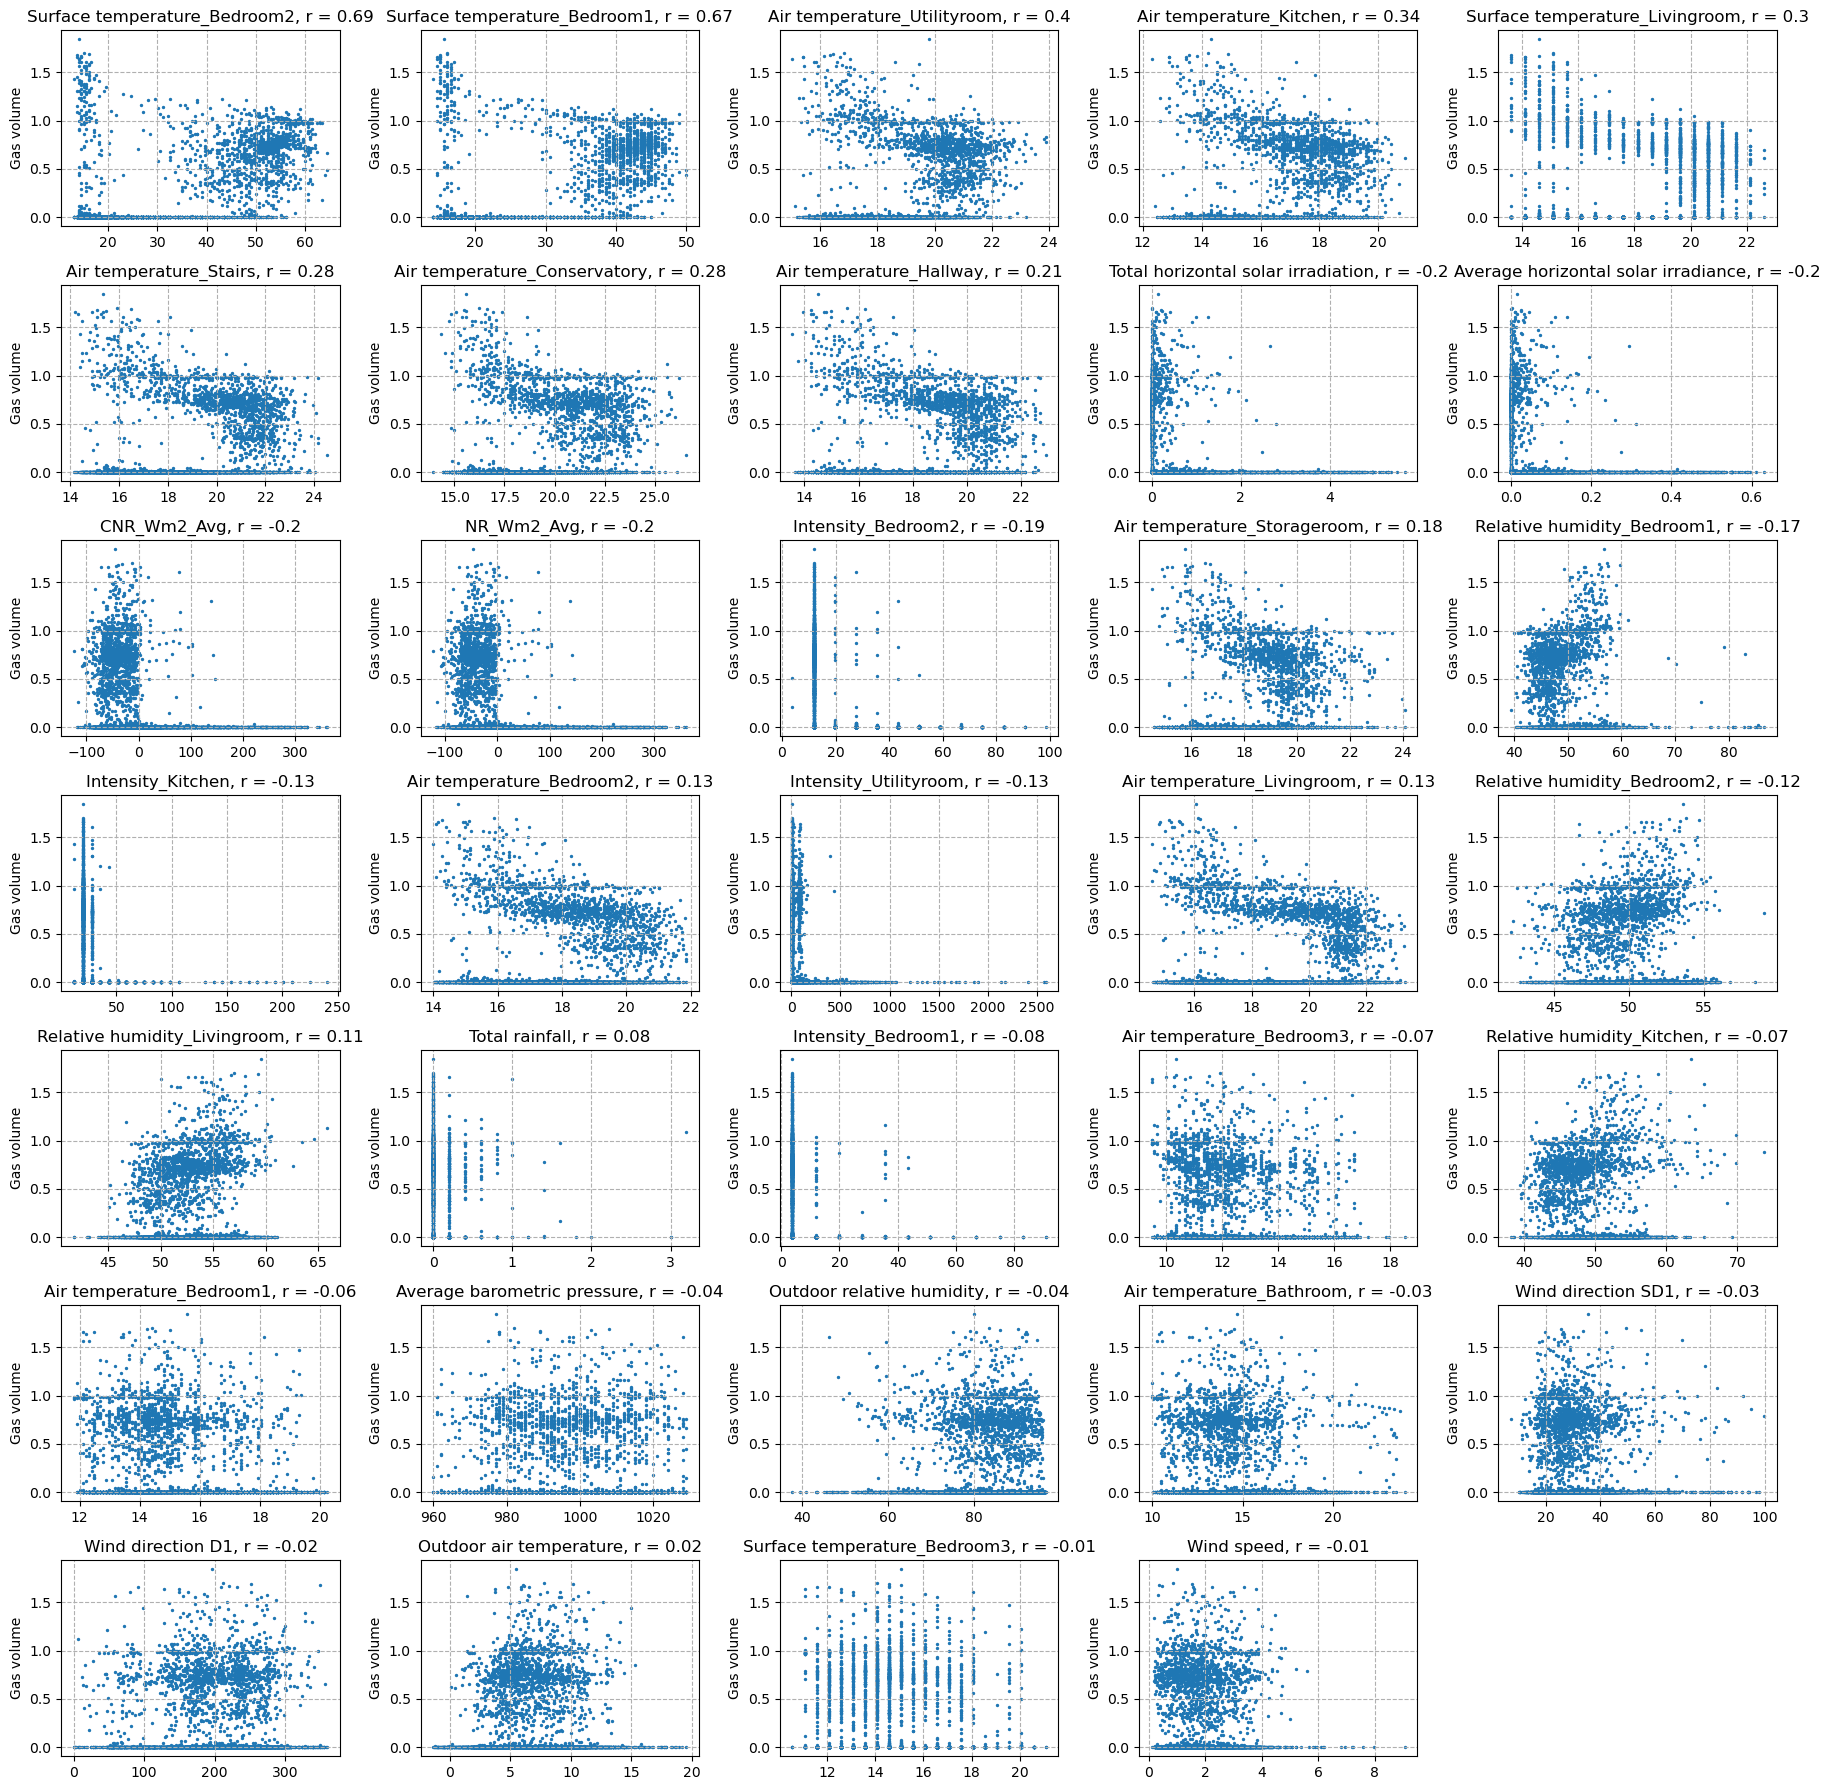

In [7]:
#  calculation of correlation coefficients between features and the gas consumption of the building 
correlations = [(features,stats.pearsonr(raw_data[features], raw_data[target_name])[0]) for features in feature_list]
correlations = sorted(correlations, key=lambda x:abs(x[1]),reverse = True) 

fig, axes = plt.subplots(7,5, figsize = (18,18))
ax = axes.flatten()
for i, (feature, correlation) in enumerate(correlations):
    raw_data.plot.scatter(x = feature, y = target_name, ax = ax[i], s = 2) # Plot feature against target
    # Format figure:
    ax[i].set_xlabel('')
    ax[i].set_title(f'{feature}, r = {round(correlation,2)}')
    ax[i].grid(ls = '--')
    
    # For the roof area only, show the x-axis with logarithmic values:
    if feature == 'roof_area': ax[i].set_xscale('log')
for j in range(i+1, len(ax)): ax[j].axis('off') # deactivate unused sub-axes
plt.tight_layout()

*Fig.3 Correlation coefficients between features and the gas consumption*

#### Step 3: Data Cleaning

By analysing the correlation of each feature with the target and the overlap time between each data, a dataset containing 33 features from 18:00 on 3 December 2013 to 00:00 on 30 March 2014 was finally selected as the training data for the machine learning model in this report.

#### Step 4: Data Pre-processing 

In [8]:
#data import
raw_data = 'Extrat_data_C.csv'
raw = pd.read_csv(raw_data)
#split target and feature
y = raw.iloc[:,1]  # Extract the target column
X = raw.iloc[:,2:] # Extract the list of all features
# Divide the training and test datasets by 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4273, 34) (1069, 34) (4273,) (1069,)


In [9]:
#standardise the dataset
scaler = StandardScaler().fit(X_train)
X_train_scale = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scale = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns )
print(X_train_scale.shape,X_test_scale.shape)

(4273, 34) (1069, 34)


#### 3.5.1 Classification
#### 3.5.1.1: Algorithm 1: KNN
#### Step 5: Feature Selection for KNN Algorithm

In [10]:
N_FOLDS = 5 # Define the number of folds
cv = KFold(n_splits = N_FOLDS, random_state=42, shuffle=True) #cross validation
cv

KFold(n_splits=5, random_state=42, shuffle=True)

In [91]:
n_features_all = X_train_scale.shape[1]
n_features = np.arange(1, n_features_all)
cv_featureSelect = pd.DataFrame(index = range(N_FOLDS), columns = n_features).fillna(0)
cv_featureSelect.index.name   = 'CV iteration'
cv_featureSelect.columns.name = 'Number of features'

In [12]:
#Select best features in Classification
for n in n_features:
    selector = SelectKBest(mutual_info_classif, k=n)
    X_new = selector.fit_transform(X_train_scale, y_train)
    # Build a KNN classifier using the selected features
    knn = KNeighborsClassifier()
    knn.fit(X_new, y_train)
    cv_featureSelect.loc[:,n] = cross_val_score(knn, X_new, y_train, cv = N_FOLDS) 


In [14]:
# Obtain cross-validation statistics
cv_stats = pd.DataFrame( [ cv_featureSelect.mean().rename('mean'),    # compute mean across the k folds
                            cv_featureSelect.std() .rename('std') ] )  # compute std. deviaiton across the k folds
cv_stats.round(3) # Display the data

Number of features,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
mean,0.919,0.937,0.934,0.937,0.931,0.934,0.934,0.933,0.933,0.931,...,0.928,0.928,0.927,0.925,0.923,0.925,0.923,0.922,0.923,0.923
std,0.008,0.006,0.006,0.004,0.008,0.008,0.009,0.011,0.009,0.005,...,0.004,0.003,0.004,0.007,0.007,0.008,0.007,0.007,0.006,0.008


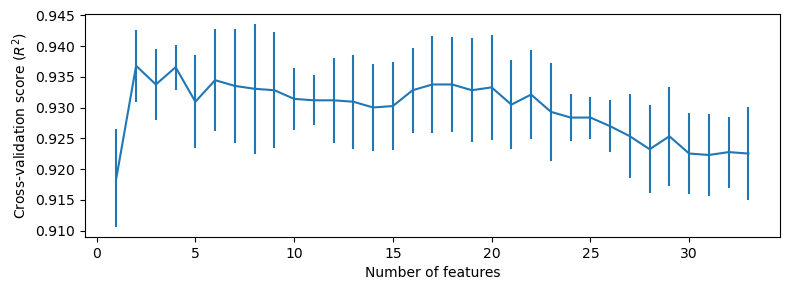

In [15]:
# Visualise dataframe with formatting
plt.figure(figsize = (8,3))
cv_stats.loc['mean'].plot(yerr = cv_stats.loc['std'], ax = plt.gca())
plt.ylabel('Cross-validation score ($R^2$)')
plt.tight_layout()

*Fig.4 Feature selection result of KNN algorithm*

In [16]:
# Set up a SelectKBest instance with mutual information as decision criterion to return the 4 best features
mutual_info = SelectKBest(mutual_info_classif, k = 4 )          # Initialise
X_reduced = pd.DataFrame(mutual_info.fit_transform(X_train_scale, y_train))
                         #, columns = mutual_info.get_feature_names_out())       # Extract the best features
X_reduced.columns = mutual_info.get_feature_names_out()
print(X_reduced.iloc[0,0:])

Air temperature_Utilityroom      -0.421130
Surface temperature_Livingroom   -0.687818
Surface temperature_Bedroom1     -0.664530
Surface temperature_Bedroom2     -0.651322
Name: 0, dtype: float64


In [17]:

X_tuning = X[['Air temperature_Utilityroom','Surface temperature_Livingroom','Surface temperature_Bedroom1',
              'Surface temperature_Bedroom2']]

In [20]:
#split the data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_tuning,y,test_size=0.2,random_state = 42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(4273, 4) (1069, 4) (4273,) (1069,)


In [21]:
#standardise the dataset
scaler = StandardScaler().fit(X_train_new)
X_train_scale_new = pd.DataFrame(scaler.transform(X_train_new), columns = X_train_new.columns)
X_test_scale_new = pd.DataFrame(scaler.transform(X_test_new),columns = X_test_new.columns )
print(X_train_scale_new.shape, X_test_scale_new.shape)

(4273, 4) (1069, 4)


#### Step 6: Hyperparameter Tunning and Model Training for KNN Algorithm

The K-Nearest Neighbours model has only one parameter, K. The range of this parameter is set as 1 to 10.

In [22]:
hyperparams = { 'n_neighbors' : np.arange(1,10) }

In [23]:
tt = time.time()

knn = KNeighborsClassifier()                        # Initiate default KNN
#knn_gridsearch = GridSearchCV(knn, hyperparams, cv = 5, scoring='r2')    # Declare GridSearch instance
knn_gridsearch = GridSearchCV(knn, hyperparams, cv = 5, scoring='accuracy')
knn_gridsearch.fit(X_train_new, y_train_new)                    # Fit the grid-search (i.e. perform the grid-search)

print('Performed hyperparameter tuning and model training in %.2fs' %(time.time()-tt))

Performed hyperparameter tuning and model training in 1.24s


In [28]:
knn_gridsearch.best_params_ # Print the best hyprtparameter

{'n_neighbors': 9}

In [29]:
knn_gridsearch.best_score_ # Print the score with the best hyprtparameter

0.9379829354807784

#### Step 7: Model Testing for KNN Algorithm

In [30]:
y_test_pred_knn = knn_gridsearch.predict(X_test_new)
print('F1',f1_score(y_test_new, y_test_pred_knn).round(3))
print('Accuracy:',accuracy_score(y_test_new, y_test_pred_knn).round(3))

F1 0.86
Accuracy: 0.93


In [31]:
print("confusion matrix :", confusion_matrix(y_test_new, y_test_pred_knn))

confusion matrix : [[763  22]
 [ 53 231]]


#### 3.5.1.2: Algorithm 2: SVM
#### Step 8: Feature Selection for SVM Algorithm

In [24]:
N_FOLDS = 5 # Define the number of folds
cv = KFold(n_splits = N_FOLDS, random_state=42, shuffle=True) #cross validation
cv

KFold(n_splits=5, random_state=42, shuffle=True)

In [92]:
n_features_all = X_train_scale.shape[1]
n_features = np.arange(1, n_features_all)
cv_featureSelect = pd.DataFrame(index = range(N_FOLDS), columns = n_features).fillna(0)
cv_featureSelect.index.name   = 'CV iteration'
cv_featureSelect.columns.name = 'Number of features'

In [26]:
#Select best features in Classification
for n in n_features:
    selector = SelectKBest(mutual_info_classif, k=n)
    X_new = selector.fit_transform(X_train_scale, y_train)
    # Build a KNN classifier using the selected features
    svc = SVC()
    svc.fit(X_new, y_train)
    cv_featureSelect.loc[:,n] = cross_val_score(svc, X_new, y_train, cv = N_FOLDS) 

In [32]:
# Obtain cross-validation statistics
cv_stats = pd.DataFrame( [ cv_featureSelect.mean().rename('mean'),    # compute mean across the k folds
                            cv_featureSelect.std() .rename('std') ] )  # compute std. deviaiton across the k folds
cv_stats.round(3) # Display the data

Number of features,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
mean,0.920,0.932,0.932,0.934,0.934,0.934,0.935,0.936,0.935,0.936,...,0.935,0.935,0.934,0.934,0.934,0.934,0.934,0.934,0.934,0.934
std,0.007,0.006,0.006,0.007,0.006,0.006,0.006,0.006,0.007,0.007,...,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.007,0.008


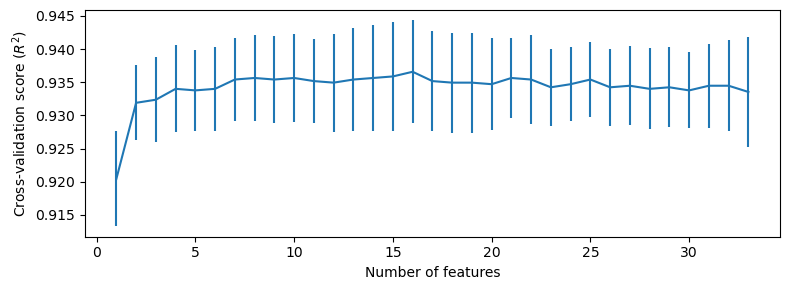

In [33]:
# Visualise dataframe with formatting
plt.figure(figsize = (8,3))
cv_stats.loc['mean'].plot(yerr = cv_stats.loc['std'], ax = plt.gca())
plt.ylabel('Cross-validation score ($R^2$)')
plt.tight_layout()

*Fig.5 Feature selection result of SVM algorithm*

In [34]:
# Set up a SelectKBest instance with mutual information as decision criterion to return the 16 best features
mutual_info = SelectKBest(mutual_info_classif, k = 16 )          # Initialise
X_reduced = pd.DataFrame(mutual_info.fit_transform(X_train_scale, y_train))
                         #, columns = mutual_info.get_feature_names_out())       # Extract the best features
X_reduced.columns = mutual_info.get_feature_names_out()
print(X_reduced.iloc[0,0:])

Total horizontal solar irradiation   -0.479086
NR_Wm2_Avg                           -0.432303
CNR_Wm2_Avg                          -0.431810
Air temperature_Livingroom           -0.387908
Air temperature_Kitchen              -0.397455
Air temperature_Utilityroom          -0.421130
Intensity_Utilityroom                -0.335276
Air temperature_Hallway              -0.321102
Air temperature_Storageroom           0.066568
Air temperature_Conservatory         -0.227804
Relative humidity_Bedroom1           -1.102959
Air temperature_Stairs               -0.600421
Air temperature_Bedroom2             -0.549782
Surface temperature_Livingroom       -0.687818
Surface temperature_Bedroom1         -0.664530
Surface temperature_Bedroom2         -0.651322
Name: 0, dtype: float64


In [35]:
# Updating the training data set
X_tuning = X[['Average horizontal solar irradiance','NR_Wm2_Avg','CNR_Wm2_Avg','Air temperature_Livingroom',
              'Air temperature_Kitchen','Air temperature_Utilityroom','Intensity_Utilityroom','Air temperature_Hallway',
              'Air temperature_Storageroom','Air temperature_Conservatory','Relative humidity_Bedroom1',
              'Air temperature_Stairs','Air temperature_Bedroom2','Surface temperature_Livingroom',
              'Surface temperature_Bedroom1','Surface temperature_Bedroom2']]

In [36]:
#split the data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_tuning,y,test_size=0.2,random_state = 42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(4273, 16) (1069, 16) (4273,) (1069,)


In [37]:
#standardise the dataset
scaler = StandardScaler().fit(X_train_new)
X_train_scale_new = pd.DataFrame(scaler.transform(X_train_new), columns = X_train_new.columns)
X_test_scale_new = pd.DataFrame(scaler.transform(X_test_new),columns = X_test_new.columns )
print(X_train_scale_new.shape, X_test_scale_new.shape)

(4273, 16) (1069, 16)


#### Step 9: Hyperparameter Tunning and Model Training for SVM Algorithm
There are two important hyperparameters in the SVM, C and γ. C is the penalty parameter, and the RBF kernel function’s coefficient γ expresses how one sample affects the categorization hyperplane as a whole.


In [38]:
hyperparams = {
    'C'     : [1, 10, 100, 1000, 10000],      # Get orders of magnitude for C
    'gamma' : [0.0001, 0.001, 0.01, 0.1, 1]   # Get orders of magnitude for gamma
}

In [39]:
tt = time.time()

svc = SVC()                        # Initiate default KNN
#knn_gridsearch = GridSearchCV(knn, hyperparams, cv = 5, scoring='r2')    # Declare GridSearch instance
svc_gridsearch = GridSearchCV(svc, hyperparams, cv = 5, scoring='accuracy')
svc_gridsearch.fit(X_train_new, y_train_new)                    # Fit the grid-search (i.e. perform the grid-search)

print('Performed hyperparameter tuning and model training in %.2fs' %(time.time()-tt))

Performed hyperparameter tuning and model training in 124.73s


In [40]:
svc_gridsearch_results = pd.DataFrame(svc_gridsearch.cv_results_)

In [41]:
# SOLUTION: Final best parameters:
svc_gridsearch.best_params_

{'C': 100, 'gamma': 0.0001}

In [42]:
svc_gridsearch.best_score_

0.9344738896421383

#### Step 10: Model Testing for SVM Algorithm

In [43]:
y_test_pred_svc = svc_gridsearch.predict(X_test_new)
print('F1',f1_score(y_test_new, y_test_pred_svc).round(3))
print('Accuracy:',accuracy_score(y_test_new, y_test_pred_svc).round(3))

F1 0.849
Accuracy: 0.924


In [44]:
print("confusion matrix :", confusion_matrix(y_test_new, y_test_pred_svc))

confusion matrix : [[761  24]
 [ 57 227]]


#### 3.5.2 Regression
#### 3.5.2.1: Algorithm 3: RF
#### Step 11: Feature Selection for RF Algorithm

In [45]:
#split feature and target
#data import
raw_data_reg = 'Extrat_data.csv'
raw_r = pd.read_csv(raw_data_reg)
#split target and feature
y_r = raw_r.iloc[:,1]  # Extract the target column
X_r = raw_r.iloc[:,2:]# Extract the list of all features
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)
print(X_train_r.shape, X_test_r.shape, y_train_r.shape, y_test_r.shape)

(4273, 34) (1069, 34) (4273,) (1069,)


In [71]:
#standardise the dataset
scaler = StandardScaler().fit(X_train_r)
X_train_scale_rnew = pd.DataFrame(scaler.transform(X_train_r), columns = X_train_r.columns)
X_test_scale_rnew = pd.DataFrame(scaler.transform(X_test_r),columns = X_test_r.columns )
print(X_train_scale_rnew.shape,X_test_scale_rnew.shape)

(4273, 34) (1069, 34)


In [72]:
N_FOLDS = 5 # Define the number of folds
cv = KFold(n_splits = N_FOLDS, random_state=42, shuffle=True) #cross validation
cv

KFold(n_splits=5, random_state=42, shuffle=True)

In [93]:
n_features_all_r = X_train_scale_rnew.shape[1]
n_features_r = np.arange(1, n_features_all_r)
cv_featureSelect_r = pd.DataFrame(index = range(N_FOLDS), columns = n_features_r).fillna(0)
cv_featureSelect_r.index.name   = 'CV iteration'
cv_featureSelect_r.columns.name = 'Number of features'

In [74]:
#Select best features in Regression
for n in n_features_r: 
     # Extract the n best features
    mutual_info = SelectKBest(mutual_info_regression, k = n )
    X_rnew = mutual_info.fit_transform(X_train_scale_rnew, y_train_r)
    
    # Train a knn and score the performance with 5-fold cross-validation
    rf = RandomForestRegressor() # Initiate model
    cv_featureSelect_r.loc[:,n] = cross_val_score(rf, X_rnew, y_train_r, cv = N_FOLDS)   

In [76]:
# Obtain cross-validation statistics
cv_stats_r = pd.DataFrame( [ cv_featureSelect_r.mean().rename('mean'),    # compute mean across the k folds
                            cv_featureSelect_r.std() .rename('std') ] )  # compute std. deviaiton across the k folds
cv_stats_r.round(2)

Number of features,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
mean,0.49,0.58,0.61,0.58,0.61,0.63,0.63,0.65,0.64,0.65,...,0.68,0.68,0.68,0.69,0.69,0.69,0.69,0.69,0.69,0.68
std,0.03,0.04,0.03,0.03,0.05,0.02,0.03,0.03,0.04,0.03,...,0.04,0.04,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04


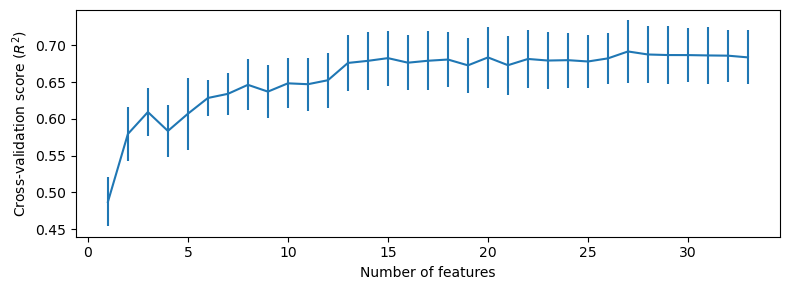

In [77]:
# Visualise dataframe with formatting
plt.figure(figsize = (8,3))
cv_stats_r.loc['mean'].plot(yerr = cv_stats_r.loc['std'], ax = plt.gca())
plt.ylabel('Cross-validation score ($R^2$)')
plt.tight_layout()

*Fig.6 Feature selection result of RF algorithm*

In [78]:
# Set up a SelectKBest instance with mutual information as decision criterion to return the 7 best features
mutual_info = SelectKBest(mutual_info_regression, k = 29 )          # Initialise
X_reduced = pd.DataFrame(mutual_info.fit_transform(X_train_scale_rnew, y_train_r))
                         #, columns = mutual_info.get_feature_names_out())       # Extract the best features
X_reduced.columns = mutual_info.get_feature_names_out()
print(X_reduced.iloc[0,0:])

Outdoor air temperature               -1.389931
Outdoor relative humidity              0.702817
Wind direction D1                      1.241923
Average horizontal solar irradiance   -0.479045
Total horizontal solar irradiation    -0.479086
NR_Wm2_Avg                            -0.432303
CNR_Wm2_Avg                           -0.431810
Average barometric pressure            1.360044
Relative humidity_Livingroom          -0.606020
Air temperature_Livingroom            -0.387908
Intensity_Kitchen                     -0.279122
Air temperature_Kitchen               -0.397455
Relative humidity_Kitchen             -0.787941
Air temperature_Utilityroom           -0.421130
Intensity_Utilityroom                 -0.335276
Air temperature_Hallway               -0.321102
Air temperature_Storageroom            0.066568
Air temperature_Conservatory          -0.227804
Air temperature_Bathroom              -0.456866
Air temperature_Bedroom1              -0.406689
Relative humidity_Bedroom1            -1

In [79]:
# Updating the training data set
X_tuning_r = X_r[['Outdoor air temperature','Outdoor relative humidity','Average horizontal solar irradiance',
                  'Total horizontal solar irradiation','NR_Wm2_Avg','CNR_Wm2_Avg','Average barometric pressure',
                  'Relative humidity_Livingroom','Air temperature_Livingroom','Intensity_Kitchen','Air temperature_Kitchen',
                  'Relative humidity_Kitchen','Air temperature_Utilityroom','Intensity_Utilityroom',
                  'Air temperature_Hallway','Air temperature_Storageroom','Air temperature_Conservatory',
                  'Air temperature_Bathroom','Air temperature_Bedroom1','Relative humidity_Bedroom1',
                  'Air temperature_Stairs','Intensity_Bedroom1','Relative humidity_Bedroom2','Air temperature_Bedroom2',
                  'Intensity_Bedroom2','Air temperature_Bedroom3','Surface temperature_Livingroom',
                  'Surface temperature_Bedroom1','Surface temperature_Bedroom2','Surface temperature_Bedroom3']]

In [80]:
#split the data
X_train_rnew, X_test_rnew, y_train_rnew, y_test_rnew = train_test_split(X_tuning_r,y_r,test_size=0.2,random_state = 42)
print(X_train_rnew.shape, X_test_rnew.shape, y_train_rnew.shape, y_test_rnew.shape)

(4273, 30) (1069, 30) (4273,) (1069,)


#### Step 12: Hyperparameter Tunning and Model Training for RF Algorithm
This research chooses n-estimators from framework hyperparameters and max_features, min_samples_leaf, and max-depth from decision tree hyperparameters. n-estimators specifies the number of regressors in the random forest, max_features are
the max number of features considered for splitting a node, max-depth of a decision tree is the maximum length from the root nodes to the leaf nodes, and min_samples_leaf are the min number of data points allowed in a leaf node.

In [81]:
# SOLUTION
rf1 = RandomForestRegressor( n_jobs = -1)
rf.fit(X_train_rnew, y_train_rnew)

# Score the fitted tree
print( 'Training score: %.3f'   % rf.score(X_train_rnew, y_train_rnew) )
print( 'Test score: %.3f' % rf.score(X_test_rnew, y_test_rnew) )

Training score: 0.959
Test score: 0.634


In [82]:
# SOLUTION (this is just an example - you can also test other ranges)
hyperparams = {  'min_samples_leaf' : [3,4,5,6,7,8], 
                 'max_depth'        : [1,2,3,None], 
                 'max_features'     : [1,2,3,None] } 

In [83]:
# SOLUTION
tt  = time.time()                                          # Log time
rf  = RandomForestRegressor()
rf_gridsearch = GridSearchCV(rf, hyperparams)             # Declare a grid search with the above-defined parameters
rf_gridsearch.fit(X_train_r, y_train_r)                                   # Perform the grid search
print('Performed grid search in %.2fs' %(time.time()-tt)) # Print the execution time

Performed grid search in 464.17s


In [84]:
# SOLUTION
# Display best score and best parameters
print('Best score: %.3f' %rf_gridsearch.best_score_)
print('Best parameters:', rf_gridsearch.best_params_)

Best score: 0.696
Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4}


In [85]:
# Tuning n_estimators
n_estimators = [1,2,2000,4000,8000]

In [86]:
# SOLUTION
hyperparams = {'n_estimators' : n_estimators }

In [90]:
# SOLUTION
tt = time.time()
rf = rf_gridsearch.best_estimator_                                 # Use best estimator from Step 3.2 as default model
rf_gridsearch2 = GridSearchCV(rf, hyperparams, n_jobs = -1)        # Declare grid search over n_estimators
rf_gridsearch2.fit(X_train_rnew, y_train_rnew)                                           # Perform grid search
print('Performed hyperparameter tuning and model training in %.2fs' %(time.time()-tt))

Performed hyperparameter tuning and model training in 1938.16s


In [39]:
# SOLUTION
rf_stats = pd.DataFrame(rf_gridsearch2.cv_results_)
rf_stats

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109374,0.009885,0.006252,0.007657,1,{'n_estimators': 1},0.536280,0.469007,0.503678,0.537635,0.546730,0.518666,0.028804,5
1,0.168749,0.022965,0.000000,0.000000,2,{'n_estimators': 2},0.576611,0.619713,0.592097,0.584017,0.705216,0.615531,0.047155,4
2,171.193091,2.248838,0.768749,0.038779,2000,{'n_estimators': 2000},0.677983,0.678416,0.695320,0.682374,0.756955,0.698210,0.030037,1
3,386.651826,16.482384,1.701048,0.116383,4000,{'n_estimators': 4000},0.675347,0.678857,0.693933,0.681219,0.756311,0.697133,0.030246,2
4,700.621407,50.442441,2.069282,0.578547,8000,{'n_estimators': 8000},0.674630,0.678462,0.694237,0.680991,0.756655,0.696995,0.030551,3


#### Step 13: Model Test for RF Algorithm

In [42]:
y_test_pred = rf_gridsearch2.predict( X_test_rnew )

In [44]:
# SOLUTION
print('R2 score: %.3f' %dt_gridsearch.score( X_test_rnew, y_test_rnew ) )  # compute R2 and print results
print('MAE: %.2f kWh/m2' %mean_absolute_error(y_test_rnew, y_test_pred) )       # compute MAE and print results
# evaluate cv(RMSE) using cross_val_score
cv_scores = cross_val_score(rf_gridsearch2, X_test_rnew, y_test_rnew, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = [sqrt(abs(score)) for score in cv_scores]

# print the mean and standard deviation of cv(RMSE)

print('Mean CV(RMSE):', np.mean(cv_rmse_scores))

R2 score: 0.675
MAE: 0.09 kWh/m2
Mean CV(RMSE): 0.23230491614942722


#### 3.5.2.2: Algorithm 4: DT
#### Step 14: Feature Selection for DT Algorithm

In [57]:
#Select best features in Regression
for n in n_features_r: 
     # Extract the n best features
    mutual_info = SelectKBest(mutual_info_regression, k = n )
    X_rnew = mutual_info.fit_transform(X_train_scale_rnew, y_train_r)
    
    # Train a knn and score the performance with 5-fold cross-validation
    decision_tree = DecisionTreeRegressor() # Initiate model
    cv_featureSelect_r.loc[:,n] = cross_val_score(decision_tree, X_rnew, y_train_r, cv = N_FOLDS)   

In [59]:
# Obtain cross-validation statistics
cv_stats_r = pd.DataFrame( [ cv_featureSelect_r.mean().rename('mean'),    # compute mean across the k folds
                            cv_featureSelect_r.std() .rename('std') ] )  # compute std. deviaiton across the k folds
cv_stats_r.round(3)

Number of features,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
mean,0.487,0.527,0.534,0.330,0.295,0.340,0.292,0.350,0.346,0.353,...,0.430,0.391,0.436,0.451,0.428,0.427,0.420,0.420,0.416,0.396
std,0.033,0.033,0.035,0.049,0.085,0.081,0.064,0.038,0.061,0.041,...,0.029,0.029,0.042,0.058,0.044,0.037,0.066,0.057,0.070,0.055


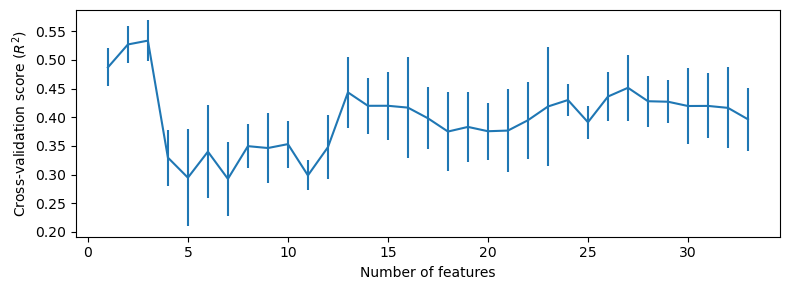

In [60]:
# Visualise dataframe with formatting
plt.figure(figsize = (8,3))
cv_stats_r.loc['mean'].plot(yerr = cv_stats_r.loc['std'], ax = plt.gca())
plt.ylabel('Cross-validation score ($R^2$)')
plt.tight_layout()

*Fig.7 Feature selection result of DT algorithm*

In [61]:
# Set up a SelectKBest instance with mutual information as decision criterion to return the 7 best features
mutual_info = SelectKBest(mutual_info_regression, k = 4 )          # Initialise
X_reduced = pd.DataFrame(mutual_info.fit_transform(X_train_scale_rnew, y_train_r))
                         #, columns = mutual_info.get_feature_names_out())       # Extract the best features
X_reduced.columns = mutual_info.get_feature_names_out()
print(X_reduced.iloc[0,0:])

Air temperature_Utilityroom      -0.421130
Surface temperature_Livingroom   -0.687818
Surface temperature_Bedroom1     -0.664530
Surface temperature_Bedroom2     -0.651322
Name: 0, dtype: float64


In [62]:
# Updating the training data set
X_tuning_r = X_r[['Air temperature_Utilityroom','Surface temperature_Livingroom','Surface temperature_Bedroom1',
                  'Surface temperature_Bedroom2']]

In [63]:
#split the data
X_train_rnew, X_test_rnew, y_train_rnew, y_test_rnew = train_test_split(X_tuning_r,y_r,test_size=0.2,random_state = 42)
print(X_train_rnew.shape, X_test_rnew.shape, y_train_rnew.shape, y_test_rnew.shape)

(4273, 4) (1069, 4) (4273,) (1069,)


In [64]:
#standardise the dataset
scaler = StandardScaler().fit(X_train_rnew)
X_train_scale_rnew = pd.DataFrame(scaler.transform(X_train_rnew), columns = X_train_rnew.columns)
X_test_scale_rnew = pd.DataFrame(scaler.transform(X_test_rnew),columns = X_test_rnew.columns )
print(X_train_scale_rnew.shape,X_test_scale_rnew.shape)

(4273, 4) (1069, 4)


#### Step 15: Hyperparameter Tunning and Model Training for DT Algorithm
This research chooses max_features, min_samples_leaf, and max-depth from decision tree hyperparameters. max_features are the max number of features considered for splitting a node, max-depth of a decision tree is the maximum length from the root nodes to the leaf nodes, and min_samples_leaf are the min number of data points allowed in a leaf node.

In [65]:
hyperparams_dt = {
    'max_features'     : ['auto', None, 15], 
    'min_samples_leaf' : [5,6,7,8,9,10,20,25,40], 
    'max_depth'        : [5,6,7,8,9,10,11,None]
}

In [69]:
# SOLUTION
tt = time.time()
decision_tree = DecisionTreeRegressor()                                      # Initiate default SVR
dt_gridsearch = GridSearchCV(decision_tree, hyperparams_dt, cv=5)    # Declare GridSearch instance
dt_gridsearch.fit(X_train_rnew, y_train_rnew)                    # Fit the grid-search (i.e. perform the grid-search)

print('Performed hyperparameter tuning and model training in %.2fs' %(time.time()-tt))

Performed hyperparameter tuning and model training in 6.69s


In [67]:
# SOLUTION
dt_gridsearch_results = pd.DataFrame(dt_gridsearch.cv_results_)

In [68]:
# SOLUTION: Final best parameters:
dt_gridsearch.best_params_

{'max_depth': 6, 'max_features': None, 'min_samples_leaf': 9}

#### Step 16: Model Test for DT Algorithm

In [78]:
y_test_pred_dt = dt_gridsearch.predict( X_test_rnew )

In [83]:
# SOLUTION
print('R2 score: %.3f' %dt_gridsearch.score( X_test_rnew, y_test_rnew ) )  # compute R2 and print results
print('MAE: %.2f kWh/m2' %mean_absolute_error(y_test_rnew, y_test_pred) )       # compute MAE and print results
# evaluate cv(RMSE) using cross_val_score
cv_scores = cross_val_score(dt_gridsearch, X_test_rnew, y_test_rnew, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = [sqrt(abs(score)) for score in cv_scores]

# print the mean and standard deviation of cv(RMSE)

print('Mean CV(RMSE):', np.mean(cv_rmse_scores))

R2 score: 0.588
MAE: 0.09 kWh/m2
Mean CV(RMSE): 0.2476421036703389


## 4. Results

### 4.1 Subtask A: Classification

The choice between the KNN and SVM unsupervised classification models depends on the specific needs and priorities of the application. The KNN model is better at correctly classifying more data points, while the SVM model is better at balancing precision and recall. The KNN model is faster, taking only 1 second to run, while the SVM model takes 124 seconds to run. Ultimately, the choice between the two models depends on the specific context and priorities of the application, with factors such as the nature of the data, the required level of accuracy, and available computational resources being important considerations.
![jupyter](./t12.png)


### 4.2 Subtask B: Regression
For the Random Forest model. the R2 score of 0.675 indicates that the unsupervised learning regression model explains 67.5 % of the variance in the target variable, which is considered a good level of performance. The MAE score of 0.07 indicates that, on average, the model's predictions are off by 0.07 units from the actual values, indicating a high level of accuracy. Finally, the CV(RMSE) score of 0.232 suggests that the model's predictions are off by 0.232 units from the actual values when predicting new data, which indicates that this model has a good level of accuracy in predicting new, unseen data. Overall, these scores suggest that the unsupervised learning regression model is a strong performer in terms of predictive power and accuracy. At the same time, the scores of the DT model suggest that the unsupervised learning regression model has some degree of predictive power, but there may be room for improvement in terms of accuracy and variability.
![jupyter](./t13.png)

## 5. Discussion
### 5.1 Performance Analysis

From the results, it can be seen that the KNN algorithm performs better than SVM in terms of both accuracy and runtime. At the same time, the KNN algorithm can achieve higher accuracy than the SVM algorithm when fewer features are required. Analysis of the results shows that KNN achieves the highest score when using only highly correlated features in the presence of highly correlated features, while the score decreases when less correlated features are added. In contrast, the SVM algorithm needs to use more features to achieve the same performance as KNN. However, the large number of features is also responsible for the long runtime of the SVM algorithm.

For the test results of the regression model, it can be found through the results that the test score of RF is much better than that of the DT, which may be due to the greater randomness of the DT. DT can only achieve higher scores with fewer features, and the use of features with low correlation coefficients may lead to confusion in the DT, resulting in lower prediction accuracy. However, although RF can achieve higher scores, it also has a much longer runtime than DT.

In particular, the number of features can have a significant impact on the training time of an unsupervised learning model. As the number of features increases, the complexity of the model also increases, and the amount of time required to train the model also increases. This is because the model needs to process and analyze more data points, which can be computationally intensive. In addition, the number of hyperparameters selected can also affect the training time. Selecting too many hyperparameters can result in a more complex model that takes longer to train.

### 5.2 The Importance of Correlation Coefficient Analysis in Feature Selection

Before the final results were obtained, the authors trained the model several times and found that the test scores for the regression model were consistently low in the range of 0.5-0.6. The reason for the low regression scores was discovered through iterative adjustment of the input data. This was because, at the outset, the authors intended to use two years of data for model training. Therefore, before cleaning the data, the authors directly removed data with greater than 80% (20 months) of missing data in the two years from the data without analysing the correlation between the features and the target. As a result, many data with high correlations (e.g. surface temperature) were not used as features for training the model and were directly removed before the model was trained. As a result, in the first few model training sessions, the training time was slow and the accuracy of the model was low due to a large amount of data and the low relevance of each feature to the target.

After correlation analysis of the data, the authors selected a four-month long dataset containing table stool temperatures for model training. The authors found a significant improvement in training results as well as training time. Therefore, one should not blindly pursue the amount of data when doing machine learning model training. This is because a high volume of data does not necessarily lead to a better model. Instead, a smaller amount of data with a higher relevance can make the model perform better. Therefore, the initial screening of features by relevance analysis is indispensable in data preparation. The use of appropriate features for training ML models can greatly improve the training time and the quality of the model.

### 5.3 Implications of Unsupervised Learning for the Smart Building Field

In recent years, data-driven models based entirely on mathematical models and measurements have been used extensively in building energy modelling. One of the main advantages of using unsupervised learning for building energy prediction, compared to using a physically based model, is the reduction in complexity. Physically based models are complex and require detailed information about the building's construction, materials, and systems, as well as accurate data on weather conditions and occupant behavior. This can be challenging and time-consuming to gather, especially for older buildings or those with limited data.

In contrast, unsupervised learning algorithms can use data from sensors and other sources without requiring detailed information about the building's physical properties. This data-driven approach can capture complex relationships between variables that may not be captured by a physically based model. Additionally, unsupervised learning algorithms can adapt to changes in the building's energy usage patterns over time, without requiring significant manual intervention.

At the same time, compared to using a physically based model, using unsupervised learning for building energy prediction does not require a high level of expertise in physics or engineering. Physically based models rely on knowledge of the physical behavior of the building and its systems, as well as accurate data on weather conditions and occupant behavior. Developing and validating these models requires significant expertise and can be time-consuming.

### 5.4 Limitation

However, the study also has certain limitations, which are listed below:
1. fewer algorithms were studied and there may not be a selected algorithm that is not the most suitable algorithm for this dataset;
2. due to time constraints, the authors did not tune all parameters included in the algorithm. Due to the amount of time required to tune the parameters, the authors have only selected the most common ones for optimisation and therefore it is possible that the model did not perform optimally;
3. the authors did not test the robustness of the model to see if the model applies to other buildings.



## 6. Conclusions

This task compares the performance of the KNN and SVM algorithms to train a classification model and the performance of RF and DT to train a regression model. The results show that KNN performs better than SVM for this dataset. RF achieves higher accuracy than DT for the regression model at the cost of longer training time and the importance of feature relevance for machine learning is also identified. Using features with high relevance can reduce training time and improve model accuracy. However, there are some limitations to the report, such as the lack of robustness sidelining of the model, the small number of algorithms tested, and the lack of adequate tuning of each algorithm. For future work, the authors suggest that more algorithms could be investigated and that each algorithm could be adequately tuned to optimise its performance, and that the model could be tested for robustness to investigate its performance when used for other building predictions.